### Datasets

Although our raw dataset was relatively tidy, we made sure to manipulate it further in the best possible way for an effective analysis. To do this we thought about our questions in hand and chose to observe a total of 15 quarters starting from Fall 2018 through Spring 2022. The raw dataset had records reaching all the way back to Fall 2009. This way, we would be able to analyze the distribution of grades from before and during the Covid-19 pandemic. We also filtered for courses at the Undergraduate level and excluded the Graduate level. This is what our `grades` dataframe looks like.

![Grades Dataframe](images/grades.png "Title")

There are 121385 rows and 6 columns. The columns are as follows: "Quarter" corresponds to the quarter and year denoted as the first letter and the last two digits of the year, (i.e. "F18"). The second column is "Course Level2" which would read as "Undergraduate" because we filtered as mentioned before. "Course" refers to the course code that each distinct class uses, (i.e. "PSTAT 100"). Next, "Instructor" is their last name followed by first initial. "Grade Given" corresponds to the letter grade distributed on the A+ to F scale, also including "IP" (In Progress), "P" (Pass), and "NP" (No Pass). The last column, "Sum of Student Count" refers to how many students received the corresponding letter grade in that given class.

Name | Variable description | Type
---|---|---
Quarter | Quarter observed: F (Fall), W (Winter), S (Spring), M (Summer), followed by the last 2 digits of the year | Character
Course Level2 | Undergraduate or graduate level | Character
Course | Course name: abbreviated for each respective department, followed by the number code | Character
Instructor | Instructor name: Last name, Initials | Character
Grade Given | Letter grade given on a scale of A through F with +/- where applicable, including IP (in progress), P (pass), and NP (no pass) | Character
Sum of Student Count | Number of students who received the corresponding grade | Numeric

We ended up adding more columns derived from the original ones to be able to refer to them more readily when doing calculations and other analyses and that will be covered later in the Methods section.

## Results

This is a figure of 16 line graphs, one for each letter grade on the A+ to F scale, including IP, P, and NP. On the x-axis we have the quarters of interest in order and the y-axis represents the proportion of students that received that grade (out of 1). We observed that the proportion of A+'s and A's jumped significantly between Fall 2019 and Spring 2020, before leveling off the following quarters, a proportion increase of about 0.06 and 0.12 respectively. Conversely, the proportions explained by the letter grades of B through the failing grades saw a trend inverse of that of the former. For example, there were less B's by 0.05 in the similar time frame and 0.03 less C's. We can conclude that professors became more lenient with their grade distributions as a result of the shift in learning caused by the Covid-19 pandemic.

![Each Letter Grade](images/each_grade.png "Title")

This is a line chart showing the distribution of each grade in the PSTAT department by quarter. As mentioned before, there was a significant proportion increase in A's.

![PSTAT Department](images/pstat.png "Title")

This is a chart displaying the trend in mean GPA for any departments and quarters that you wish to see (after converting letter grades into a numerical point scale). For this sample, we chose the PSTAT, MATH, ECON, TMP, PSY, and SOC departments as these are very populated majors. As seen, a similar trend is present as expected with the highest mean GPA in Spring 2020 before leveling off and showing a continuing downwards trend towards present day. We see volatility in the quarters right after Spring 2020, and this is explained by professors struggling to adjust standards for grade distributions. The TMP department was an outlier in this case, mean GPA was all over the place and was much lower than the other departments- this is explained by TMP courses curriculum being much more dependent on real life interactions, and was perceived as a secondary field of study, where students would prioritize their main courses first.

![Quarters and Departments of Choice](images/dept_q_choice.png "Title")

The following figures are of two bar plots, the first showing the top 5 and bottom 5 departments in terms of change in mean GPA between during and before the Covid-19 pandemic. It was interesting to see two common departments on both sides of the spectrum on both occasions- the Astronomy detpartment saw an incredible 0.6 increase in mean GPA as a result of the shift but dropped down by a similar amount when compared with more recent trends, to take its place on the most extreme ends. On the other hand, the Education department saw a 0.1 decrease in mean during Covid but came back up by 0.3 later on.

![Mean Differentials When Comparing After and During Covid-19](images/diff_2.png "Title")
![Mean Differentials When Comparing During and Before Covid-19](images/diff_1.png "Title")

## Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
grades = pd.read_csv('data/ucsb-grades.csv')
grades.head(5)

,Quarter,Course Level2,Course,Instructor,Grade Given,Sum of Student Count
0,S22,Undergraduate,ANTH 2,WALSH C,A,274
1,S22,Undergraduate,ANTH 2,WALSH C,A-,101
2,S22,Undergraduate,ANTH 2,WALSH C,A+,11
3,S22,Undergraduate,ANTH 2,WALSH C,B,37
4,S22,Undergraduate,ANTH 2,WALSH C,B-,13


In [4]:
# defining quarters of interest
quarters = ['F18', 'W19', 'S19', 'M19', 'F19', 'W20',
            'S20', 'M20', 'F20', 'W21', 'S21', 'M21',
            'F21', 'W22', 'S22']

In [5]:
# converting letter grades to grade point scale
letter_to_gpa = [('A+', 4.0), ('A', 4.0), ('A-', 3.7), ('B+', 3.3), ('B', 3.0), ('B-', 2.7), ('C+', 2.3), ('C', 2.0), 
                 ('C-', 1.7), ('D+', 1.3), ('D', 1.0), ('D-', 0.7), ('F', 0.0)]
grades['GPA'] = grades['Grade Given'].map(dict(letter_to_gpa))

grades

,Quarter,Course Level2,Course,Instructor,Grade Given,Sum of Student Count,GPA
0,S22,Undergraduate,ANTH 2,WALSH C,A,274,4.0
1,S22,Undergraduate,ANTH 2,WALSH C,A-,101,3.7
2,S22,Undergraduate,ANTH 2,WALSH C,A+,11,4.0
3,S22,Undergraduate,ANTH 2,WALSH C,B,37,3.0
4,S22,Undergraduate,ANTH 2,WALSH C,B-,13,2.7
...,...,...,...,...,...,...,...
121380,F18,Undergraduate,WRIT 199,FRANK D M,A+,1,4.0
121381,F18,Undergraduate,WRIT 199,GENOVA G L,A+,3,4.0
121382,F18,Undergraduate,WRIT 199,MORRIS N S,A+,2,4.0
121383,F18,Undergraduate,WRIT 199,MORRIS N S,A,2,4.0


In [6]:
# create a new column called Unit Points that gets the product of the Sum of Student Count and GPA columns
grades['Unit Points'] = grades['Sum of Student Count'] * grades['GPA']

In [7]:
# remove unusual spacing between course and course numbers
grades = grades.copy()
course_split = grades['Course'].str.split()
grades['Course'] = course_split.str.join(' ')

# remove courses with 199 (independent study)
grades = grades[~grades['Course'].str.contains('199')]

# create departments column
grades['Department'] = grades.loc[:, 'Course'].str.split().str[0]

In [8]:
# online versions of a department grouped to original and names for a few departments updated accounting for the split
grades['Department'] = grades['Department'].replace(
    {'ARTHIW': 'ARTHI', 
     'AS': 'AS AM',
     'C': 'C LIT', 
     'CH': 'CH ST',
     'CMPSCW': 'CMPSC', 
     'CNCSPW': 'CNCSP', 
     'EARTHW': 'EARTH', 
     'PSTATW': 'PSTAT', 
     'DANCEW': 'DANCE', 
     'FAMSTW': 'FAMST', 
     'FEMSTW': 'FEMST'}
)

# show unique departments
print('Number of unique departments:', len(grades.Department.unique()))
grades.Department.unique()

Number of unique departments: 68


array(['ANTH', 'ART', 'ARTHI', 'AS AM', 'ASTRO', 'BIOL', 'BL', 'C LIT',
       'CH ST', 'CHEM', 'CHIN', 'CLASS', 'CMPSC', 'CMPTGCS', 'CNCSP',
       'COMM', 'DANCE', 'EACS', 'EARTH', 'ECE', 'ECON', 'ED', 'EEMB',
       'ENGL', 'ENGR', 'ENV', 'ES', 'ESS', 'FAMST', 'FEMST', 'FR', 'GEOG',
       'GER', 'GLOBL', 'GREEK', 'HIST', 'INT', 'ITAL', 'JAPAN', 'KOR',
       'LAIS', 'LATIN', 'LING', 'MAT', 'MATH', 'MATRL', 'MCDB', 'ME',
       'MS', 'MUS', 'PHIL', 'PHYS', 'POL', 'PORT', 'PSTAT', 'PSY', 'RG',
       'RUSS', 'SHS', 'SLAV', 'SOC', 'SPAN', 'THTR', 'TMP', 'W&L', 'WRIT',
       'MES', 'HEB'], dtype=object)

In [9]:
# split dataframe into 3 to get grades before, during, and after Covid-19 pandemic
grades_before = grades[(grades['Quarter'].isin(quarters[:6]))]
grades_during = grades[(grades['Quarter'].isin(quarters[6:12]))]
grades_after = grades[(grades['Quarter'].isin(quarters[12:]))]

In [10]:
# calculating means before Covid
means_before_covid = {}
for dept in grades_before.Department.unique():
    grades_before_by_dept = grades_before[grades_before.Department == dept]
    total_unit_points_before_covid = grades_before_by_dept['Unit Points'].sum()
    total_sum_of_student_counts_before_covid = grades_before_by_dept['Sum of Student Count'].sum()
    dept_mean_before = total_unit_points_before_covid / total_sum_of_student_counts_before_covid
    means_before_covid[dept] = dept_mean_before

In [11]:
# calculating means during Covid
means_during_covid = {}
for dept in grades_during.Department.unique():
    grades_during_by_dept = grades_during[grades_during.Department == dept]
    total_unit_points_during_covid = grades_during_by_dept['Unit Points'].sum()
    total_sum_of_student_counts_during_covid = grades_during_by_dept['Sum of Student Count'].sum()
    dept_mean_during = total_unit_points_during_covid / total_sum_of_student_counts_during_covid
    means_during_covid[dept] = dept_mean_during

In [12]:
# calculating means after Covid
means_after_covid = {}
for dept in grades_after.Department.unique():
    grades_after_by_dept = grades_after[grades_after.Department == dept]
    total_unit_points_after_covid = grades_after_by_dept['Unit Points'].sum()
    total_sum_of_student_counts_after_covid = grades_after_by_dept['Sum of Student Count'].sum()
    dept_mean_after = total_unit_points_after_covid / total_sum_of_student_counts_after_covid
    means_after_covid[dept] = dept_mean_after

In [13]:
# calculate difference in means between during and before
diff_means_during_before = {}
for dept in means_during_covid:
    if dept in means_before_covid:
        diff_mean_1 = means_during_covid[dept] - means_before_covid[dept]
        diff_means_during_before[dept] = diff_mean_1

sorted_during_before = dict(sorted(diff_means_during_before.items(), key=lambda item: item[1]))

In [14]:
# calculate difference in means between after and during
diff_means_after_during = {}
for dept in means_after_covid:
    if dept in means_during_covid:
        diff_mean_2 = means_after_covid[dept] - means_during_covid[dept]
        diff_means_after_during[dept] = diff_mean_2

sorted_after_during = dict(sorted(diff_means_after_during.items(), key=lambda item: item[1]))

In [15]:
# plot first differential
during_before_means = pd.DataFrame(list(sorted_during_before.items()), columns=['Department', 'Mean Differential'])
first_and_last_ten_during_before = pd.concat([during_before_means.head(10), during_before_means.tail(10)])
during_before_chart = alt.Chart(first_and_last_ten_during_before).mark_bar().encode(
    x = alt.X('Department:N', sort=list(during_before_means['Department'])),
    y = alt.Y('Mean Differential:Q', axis=alt.Axis(title='Mean Differential')),
    color = alt.condition(
        alt.datum['Mean Differential'] > 0,
        alt.value('green'),
        alt.value('red')
    ) 
).properties(
    title = 'Change in Mean GPA Before and During Online Instruction',
    width = 350
)

In [16]:
# plot second differential
after_during_means = pd.DataFrame(list(sorted_after_during.items()), columns=['Department', 'Mean Differential'])
first_and_last_ten_after_during = pd.concat([after_during_means.head(10), after_during_means.tail(10)])
after_during_chart = alt.Chart(first_and_last_ten_after_during).mark_bar().encode(
    x = alt.X('Department:N', sort=list(after_during_means['Department'])),
    y = alt.Y('Mean Differential:Q', axis=alt.Axis(title='Mean Differential')),
    color = alt.condition(
        alt.datum['Mean Differential'] > 0,
        alt.value('green'),
        alt.value('red')
    ) 
).properties(
    title = 'Change in Mean GPA During and After Online Instruction',
    width = 350
)

In [17]:
during_before_chart | after_during_chart

alt.HConcatChart(...)

### Mean GPA change by Departments and Quarters of Choice

In [18]:
def calculate_mean_dept_quarter(grades, quarter, course):
    # Filter the data frame to include only the rows for the specified quarter and course
    specified_course = grades[(grades['Quarter'] == quarter) & (grades['Course'].str.contains(course))]
    
    # Create a new column called Unit Points that is the product of the GPA and Sum of Student Counts columns
    specified_course['Unit Points'] = specified_course['Sum of Student Count'] * specified_course['GPA']
    
    # Calculate the sums of 'Unit Points' and 'Sum of Student Count' for the filtered data frame
    total_unit_points = specified_course['Unit Points'].sum()
    total_sum_of_student_counts = specified_course['Sum of Student Count'].sum()
    
    # Calculate the mean
    mean = total_unit_points / total_sum_of_student_counts
    
    # return the mean
    return mean

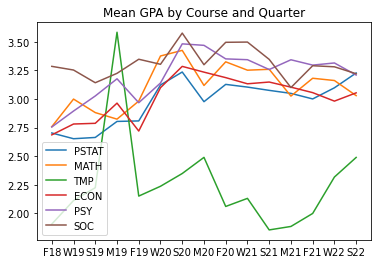

In [19]:
# Define a list of courses and quarters to plot
courses = ['PSTAT', 'MATH', 'TMP', 'ECON', 'PSY', 'SOC']
quarters = ['F18', 'W19', 'S19', 'M19', 'F19', 'W20',
            'S20', 'M20', 'F20', 'W21', 'S21', 'M21',
            'F21', 'W22', 'S22']

# Create a figure and axis object
fig, ax = plt.subplots()

# Loop through the courses and plot the mean GPA for each quarter
for course in courses:
    means = [calculate_mean_dept_quarter(grades, quarter, course) for quarter in quarters]
    ax.plot(quarters, means, label=course)

# Add a legend and title
ax.legend()
ax.set_title('Mean GPA by Course and Quarter')

# Show the plot
plt.show()